This notebook uses SDXL with a LoRA to generate pixel art.

In [2]:
from diffusers import AutoPipelineForText2Image
import torch
from IPython import display

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")
pipe.load_lora_weights("nerijs/pixel-art-xl", adapter_name="pixel")
pipe.set_adapters(["pixel"], adapter_weights=[1.0])
pipe.to(device="cuda", dtype=torch.float16)
print()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

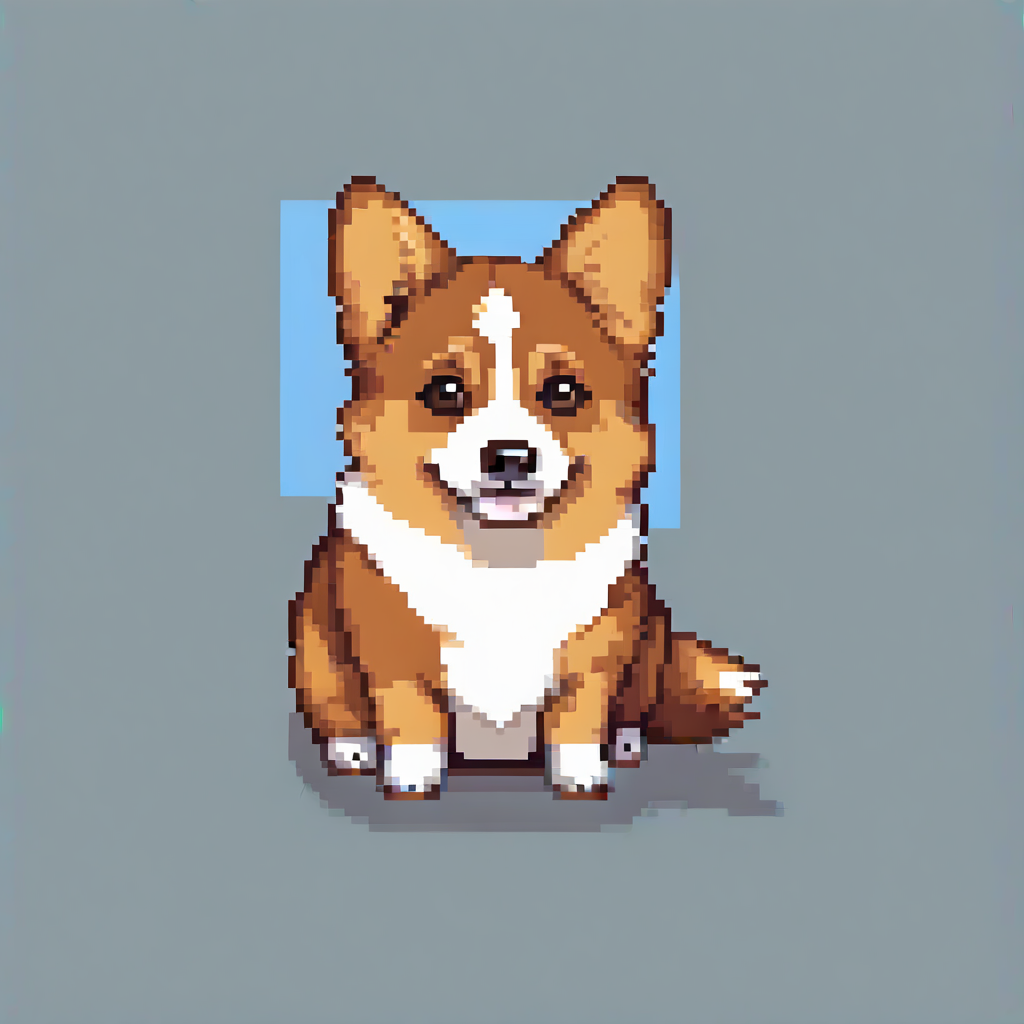

In [13]:
prompt = "a cute corgi, pixel art"
negative_prompt = "ugly"

image = pipe(prompt=prompt,
           negative_prompt=negative_prompt, 
           num_inference_steps=10, 
           guidance_scale=10.5).images[0]
image